### Importing libraries 

In [1]:
# Loading required libraries.

# Used for data manipulation and visualization.
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

# Used for evaluating model performance.
from sklearn.metrics import r2_score

# Used to ignore warning messages.
import warnings
warnings.filterwarnings("ignore")

### Loading and exploring data

In [2]:
# load the dataset from a CSV file.
data=pd.read_csv('F:\SAMIHA\konverge.ai\Internal Project\Dataset.csv') 

# view the first few rows of the dataset.
data.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# To get overall information about dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### There are total 50 rows and 5 columns. 

### Handling missing values

In [4]:
# check for missing values in each column.
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### No null values are there in this dataset.

In [5]:
# checking the shape of data before removing duplicates
data.shape

(50, 5)

In [6]:
# removing duplicates from this dataset
data.drop_duplicates(keep="first",inplace= True)

In [7]:
# checking the shape of data after removing duplicates
data.shape

(50, 5)

#### There were no duplicates in this dataset, as we can see that the shape of the dataset after removing duplicates is same as before. 

In [8]:
# Statistical information
data.describe().T  # T is attribute to tranpose the result of 'describe', making statistics appear column-wise.

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


#### R&D Spend(mean)>R&D Spend(median) therefore data is positively skewed
#### Administration(mean)< Administration(median) therefore data is negatively skewed
#### Marketing Spend(mean)< Marketing Spend(median) therefore data is negatively skewed
#### Profit(mean)> Profit(median) therefore data is positively skewed. 

### EDA (Exploratory data analysis) with visualization 

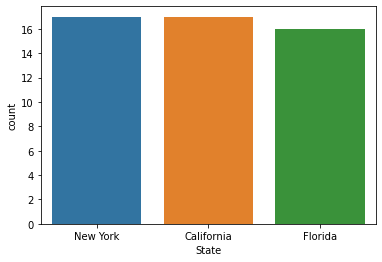

In [9]:
# Univariate Analysis - In Univariate Analysis,we analyze data of just one variable. 

sns.countplot(data=data,x=data["State"]) # visualize the distribution of categorical variables.
plt.show()

#### Distribution of NY and California is same whereas count of florida is little bit less 

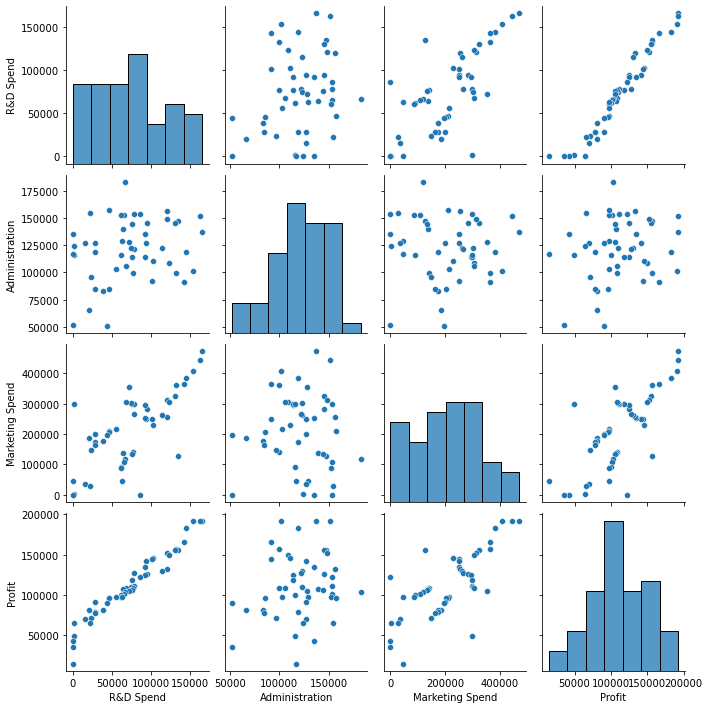

In [10]:
# Bivariate Analysis

sns.pairplot(data=data) #visualize pairwise relationships between numerical variables.
plt.show()

#### From the above plot we can able to visualize that R&D and Profit has positive correlation.
#### Zero correlation between Administration and Profit.
#### High correlation between Marketing Spend and Profit. 
#### R&D is directly proportional to the investment that we can do.

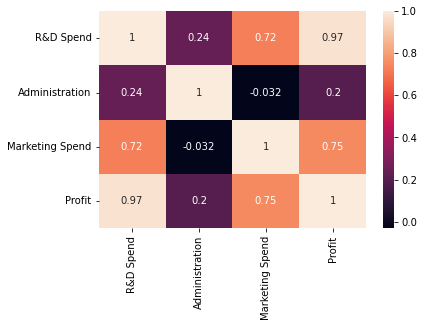

In [11]:
# plotting heatmap.

sns.heatmap(data.corr(),annot=True) #  create a correlation heatmap of the variables.
plt.show()

#### R&D Spend and Profit is highly correlated.
#### Marketing Spend & R&D Spend and R&D Spend & profit is also highly correlated. 

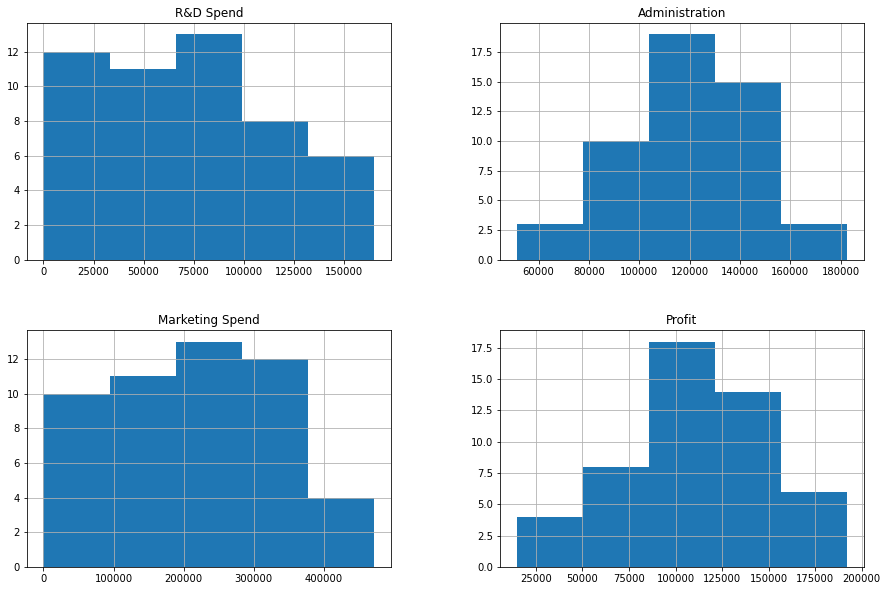

In [12]:
# visual representation of data distribution

data.hist(figsize=(15,10),bins=5) # plot histograms of the numerical variables.
plt.show()

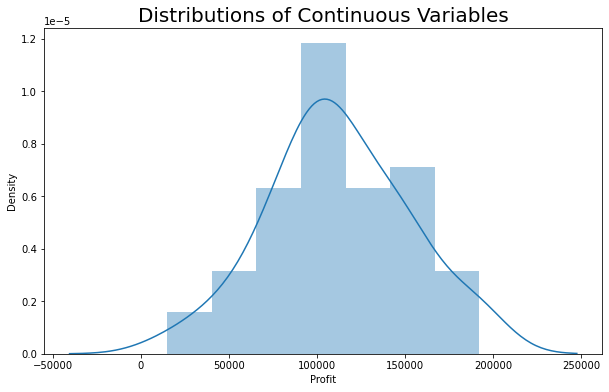

In [13]:
plt.figure(figsize=(10,6)) # creates a figure object with specified figure size of 10 inches in width and 6 inches in height.
plt.title("Distributions of Continuous Variables", fontsize=20)
sns.distplot(data['Profit'])  # creates a histogram and a kernel density estimate (KDE) plot of the 'Profit' 
plt.show()

#### profit is our target column which is normally distributed. 

### Data preprocessing 

In [14]:
# spliting Dataset in Dependent (Y) & Independent Variables (X)
# 'values' attribute returns the selected values as a NumPy array.

X=data.iloc[:,:-1].values # all columns excluding the last column
y=data.iloc[:,4].values # 5th column

In [15]:
# Encoding

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() # creates an instance of the LabelEncoder class
X[:,3] = labelencoder.fit_transform(X[:,3]) # encoding 4th column (state variable)
X1 = pd.DataFrame(X)  # create a dataframe for X (converts the NumPy array X back to a pandas DataFrame)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


### Splitting the data into training and testing sets 

In [16]:
# split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
X_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

### Feature scaling

In [17]:
#  The resulting data will have the mean as 0 and the standard deviation as 1.
# transforming subtracts the mean and divides by the standard deviation, hence standardizing the data.

from sklearn.preprocessing import StandardScaler # to scale the features.

sc_X = StandardScaler() # create instance for independent variable
X_train = sc_X.fit_transform(X_train)  # Fit and transform X_train
X_test = sc_X.transform(X_test) # Transform X_test
sc_y = StandardScaler() # # create instance for dependent variable
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)) # Fit and transform y_train
y_test = sc_y.transform(y_test.reshape(-1, 1)) # Transform y_test

### Training and evaluating the model 

In [18]:
# Training the model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Create linear regression model
regressor.fit(X_train, y_train) # Fit the model to the training data

y_pred = regressor.predict(X_test) # Predict the target variable 
y_pred

array([[-0.14344897],
       [ 0.51920131],
       [ 0.54420342],
       [-0.88087903],
       [ 1.61424072],
       [ 0.10379038],
       [-1.01622161],
       [-0.27349156],
       [ 0.09460877],
       [ 1.36855176],
       [-0.3241692 ],
       [-0.5141967 ],
       [ 0.01073627],
       [-0.45774737],
       [ 0.4082523 ]])

In [19]:
# evaluating the model

# using regressor.score() 
testing_data_model_score = regressor.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = regressor.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

# using R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Model Score/Performance on Testing data 0.9355139722149945
Model Score/Performance on Training data 0.9515496105627431
R2 Score: 0.9355139722149945


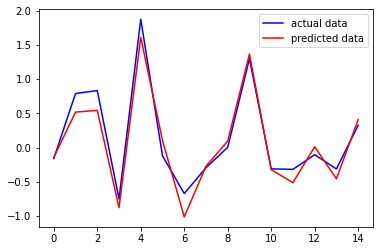

In [20]:
# Plotting Tested and predicted data

p= plt.plot(y_test, color = "blue", label= "actual data") # Plot the actual data 
a= plt.plot(y_pred, color = "red", label = "predicted data") # Plot the predicted data
plt.legend()
plt.show()